In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Compute the metrics
def evalute(y_test, y_pred, threshold):
    y_pred = (y_pred[:,1] >= threshold).astype(bool)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')

# Plot ROC curves
def plot_roc(fpr, tpr, thresholds, g_opt_idx=None, j_opt_idx=None):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    plt.plot([0,1], [0,1], linestyle='--', label='Random Classifier')
    plt.plot(fpr, tpr, linewidth=2, label='Logistic')
    if g_opt_idx:
        plt.scatter(fpr[g_opt_idx], tpr[g_opt_idx], s=15, color='green', label='G-mean Optimal Threshold', zorder=5)
        threshold = thresholds[g_opt_idx]
        print(f'G-mean Optimal Threshold: {threshold}')
    elif j_opt_idx:
        plt.scatter(fpr[j_opt_idx], tpr[j_opt_idx], s=15, color='green', label='J statistic Optimal Threshold', zorder=5)
        threshold = thresholds[j_opt_idx]
        print(f"Youden's J statistic Optimal Threshold: {threshold}")
    else:
        threshold = 0.5
        print(f"Default Threshold: {0.5}")
    evalute(y_test, y_pred, threshold)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot PR curves
def plot_pr(y_test, y_pred, f1_opt=False):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred[:,1])
    all1_precision = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0,1], [all1_precision, all1_precision], linestyle='--', label='Always Positive')
    plt.plot(recalls, precisions, linewidth=2, label='Logistic')
    if f1_opt:
        fscore = (2 * precisions * recalls) / (precisions + recalls)
        f1_opt_idx = np.argmax(fscore)
        plt.scatter(recalls[f1_opt_idx], precisions[f1_opt_idx], marker='o', color='green', label='Best', zorder=5)
        threshold = thresholds[f1_opt_idx]
        print(f"F1-score Optimal Threshold: {threshold}")
    else:
        threshold = 0.5
        print(f"Default Threshold: {0.5}")
    evalute(y_test, y_pred, threshold)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# Threshold Tuning with ROC Curves

Default Threshold: 0.5
Accuracy: 0.9434
Precision: 0.7903225806451613
Recall: 0.5891783567134269
F1: 0.6750861079219288


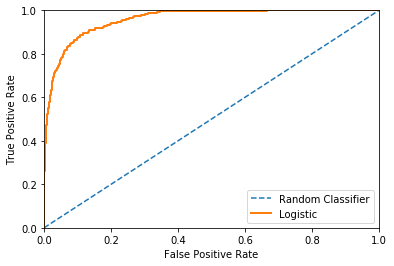

In [2]:
X, y = make_classification(
    n_samples=10000, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.9],
    flip_y=0, 
    random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
plot_roc(fpr, tpr, thresholds)

## G-Mean

Default Threshold: 0.5
Accuracy: 0.9434
Precision: 0.7903225806451613
Recall: 0.5891783567134269
F1: 0.6750861079219288


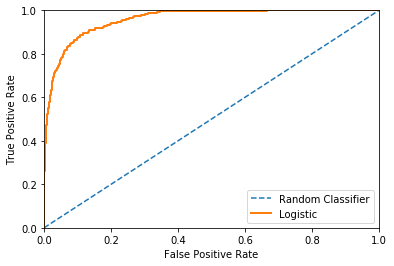

In [3]:
X, y = make_classification(
    n_samples=10000, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.9],
    flip_y=0, 
    random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
plot_roc(fpr, tpr, thresholds)

## Youden's J statistic

Default Threshold: 0.5
Accuracy: 0.9434
Precision: 0.7903225806451613
Recall: 0.5891783567134269
F1: 0.6750861079219288


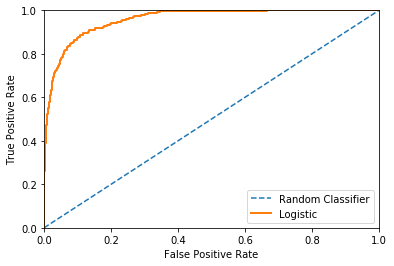

In [4]:
X, y = make_classification(
    n_samples=10000, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.9],
    flip_y=0, 
    random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
plot_roc(fpr, tpr, thresholds)

## G-Mean VS Youden's J statistic

In [5]:
X, y = make_classification(
    n_samples=10000, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.75],
    flip_y=0, 
    random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
g_mean = np.sqrt(tpr * (1-fpr))
g_opt_idx = np.argmax(g_mean)
j_opt_idx = np.argmax(tpr-fpr)
print(f'G-mean Optimal Threshold: {thresholds[g_opt_idx]}')
print(f"Youden's J statistic Optimal Threshold: {thresholds[j_opt_idx]}")

G-mean Optimal Threshold: 0.2731873657516127
Youden's J statistic Optimal Threshold: 0.21728286397510374


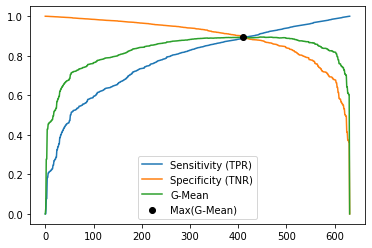

In [6]:
plt.plot(tpr, label='Sensitivity (TPR)')
plt.plot((1-fpr), label='Specificity (TNR)')
plt.plot(g_mean, label='G-Mean')
plt.scatter(g_opt_idx, np.max(g_mean), zorder=10, label='Max(G-Mean)', color='black')
plt.legend()
plt.show()

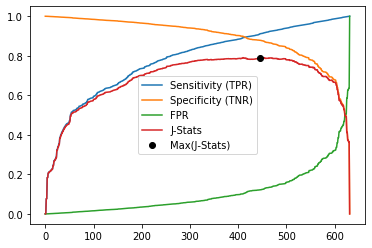

In [7]:
plt.plot(tpr, label='Sensitivity (TPR)')
plt.plot((1-fpr), label='Specificity (TNR)')
plt.plot(fpr, label='FPR')
plt.plot(tpr-fpr, label='J-Stats')
plt.scatter(j_opt_idx, np.max(tpr-fpr), zorder=10, label='Max(J-Stats)', color='black')
plt.legend()
plt.show()

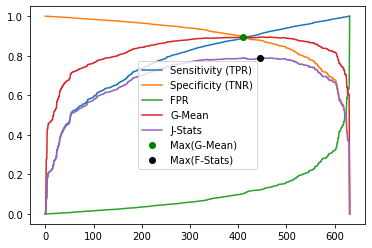

In [8]:
plt.plot(tpr, label='Sensitivity (TPR)')
plt.plot((1-fpr), label='Specificity (TNR)')
plt.plot(fpr, label='FPR')
plt.plot(g_mean, label='G-Mean')
plt.plot(tpr-fpr, label='J-Stats')
plt.scatter(g_opt_idx, np.max(g_mean), zorder=10, label='Max(G-Mean)', color='green')
plt.scatter(j_opt_idx, np.max(tpr-fpr), zorder=10, label='Max(F-Stats)', color='black')
plt.legend()
plt.show()

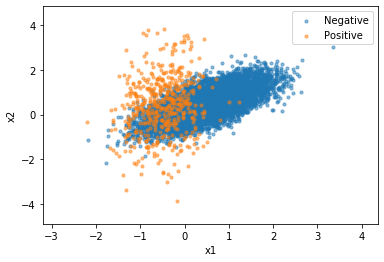

In [12]:
def scatter_plot(X, y, plot_boundary=False, b=None, w1=None, w2=None, title=None):
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    plt.scatter(X[y==0, 0], X[y==0, 1], s=10, alpha=0.5, label='Negative')
    plt.scatter(X[y==1, 0], X[y==1, 1], s=10, alpha=0.5, label='Positive')
    if plot_boundary:
        intercept = -b/w2 # in x1,x2 plate
        slope = -w1/w2
        x1 = np.array([x1_min, x1_max])
        x2 = slope*x1 + intercept
        plt.plot(x1, x2, 'k', lw=1, ls='--')
        plt.fill_between(x1, x2, x2_min, color='tab:orange', alpha=0.2)
        plt.fill_between(x1, x2, x2_max, color='tab:blue', alpha=0.2)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

X, y = make_classification(
    n_samples=10000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.95], 
    flip_y=0, 
    class_sep=-0.5,
    random_state=20
)
scatter_plot(X, y)

# Threshold Tuning with PR Curve

Default Threshold: 0.5
Accuracy: 0.9434
Precision: 0.7903225806451613
Recall: 0.5891783567134269
F1: 0.6750861079219288


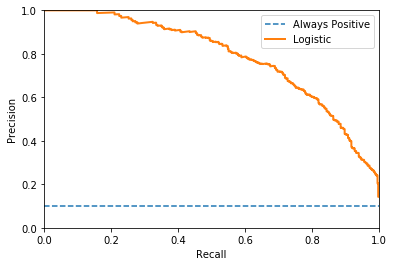

In [10]:
X, y = make_classification(
    n_samples=10000, 
    n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.9],
    flip_y=0, 
    random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
plot_pr(y_test, y_pred)

## F-score

F1-score Optimal Threshold: 0.38963203751105846
Accuracy: 0.9454
Precision: 0.7445887445887446
Recall: 0.6893787575150301
F1: 0.7159209157127993


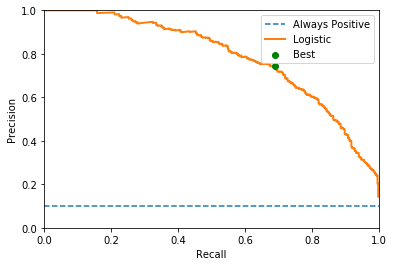

In [11]:
plot_pr(y_test, y_pred, f1_opt=True)